In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
%matplotlib notebook

In [3]:
def powerspectrum(t,somefoft):
    import numpy as np
    dt = t[1]-t[0]
    freq = np.fft.fftfreq(t.shape[-1])/dt; #print('freq', freq[0:5])
    freq2 = np.fft.fftshift(freq); #print('freq2', freq2[0:5])
    sp = np.fft.fft(somefoft)
    sp2 = np.fft.fftshift(sp)
    powerspec = sp.real**2 + sp.imag**2
    powerspec2 = np.fft.fftshift(powerspec)
    nmax = np.int((len(t)/2)); print(nmax)
    return freq[0:nmax], powerspec[0:nmax]

In [4]:
def givemeflicker(t,std):
    
    # Lay out the time axis
    dt = t[1]-t[0]; #print(dt)

    # Make a time-dependent white noise variable
    mean = 0
    foft = np.random.normal(mean, std, size=len(t))

    # FT it
    sp = np.fft.fft(foft)
    freq = np.fft.fftfreq(t.shape[-1])/dt

    # Modulate the amplitude 
    freq[0]=1e-10
    #sp3 = sp/np.abs(freq)**.5
    sp3 = sp/np.abs(freq)
    
    # Zero out the DC component (mean)
    sp3[0] = 0

    # IFFT it
    isp = np.real(np.fft.ifft(sp3))

    # Return the time series
    return isp

Next code block is making sure our power spectrum makes sense

<IPython.core.display.Javascript object>


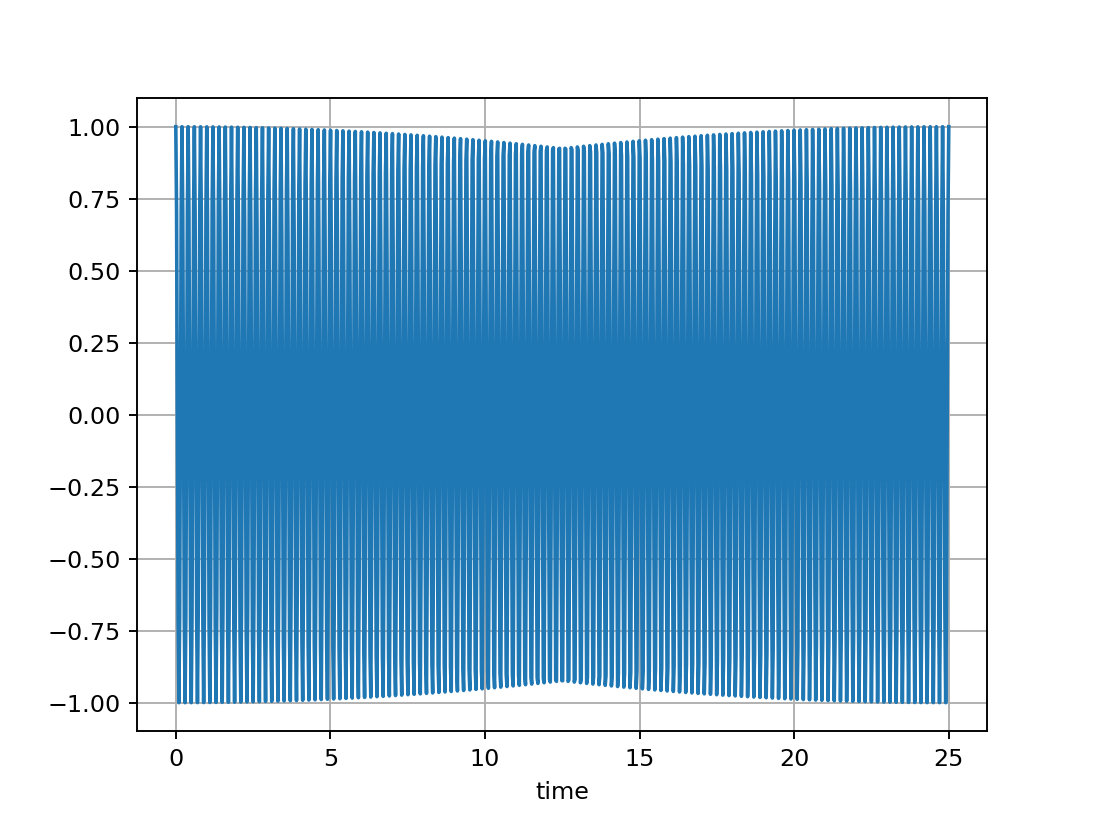

500


<IPython.core.display.Javascript object>


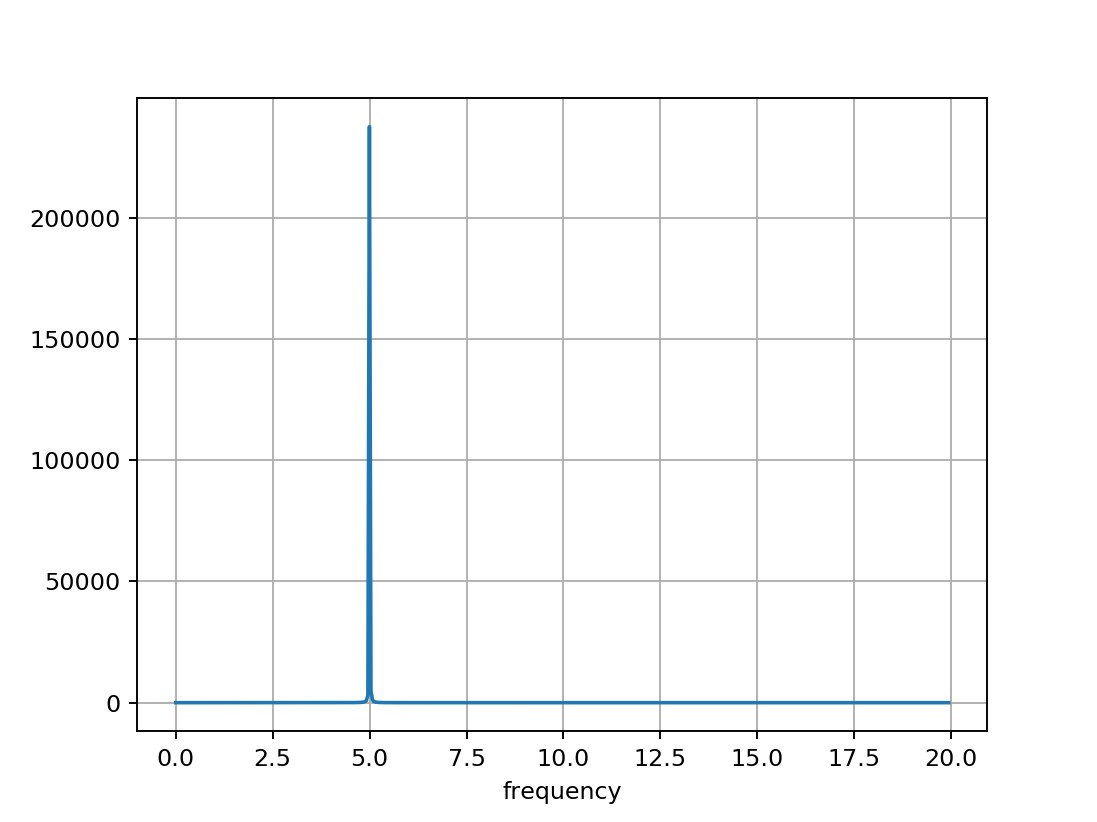

Text(0.5,0,'frequency')

In [5]:
# Generate a time series for a sinusoidal signal
omega = 5
tmax =  25
num_samples = 1000
t = np.linspace(0,tmax,num_samples)
foft = np.cos(np.pi*2*omega*t)

# Plot it
plt.figure()
plt.plot(t,foft)
plt.grid(True)
plt.xlabel('time')

# Get the power spectrum
myfreq, mypower = powerspectrum(t,foft)

# Plot it
plt.figure()
plt.plot(myfreq,mypower)
plt.grid(True)
plt.xlabel('frequency')

This code block analyzes white noise

<IPython.core.display.Javascript object>


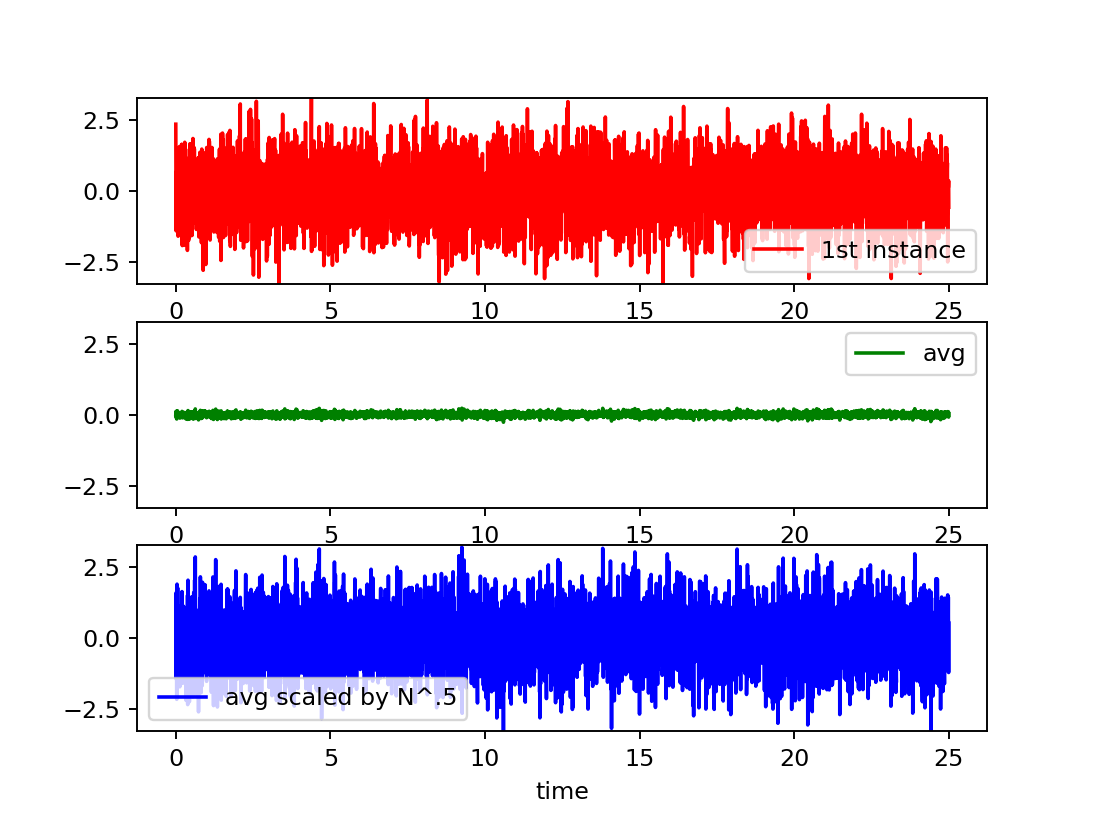

2500


<IPython.core.display.Javascript object>


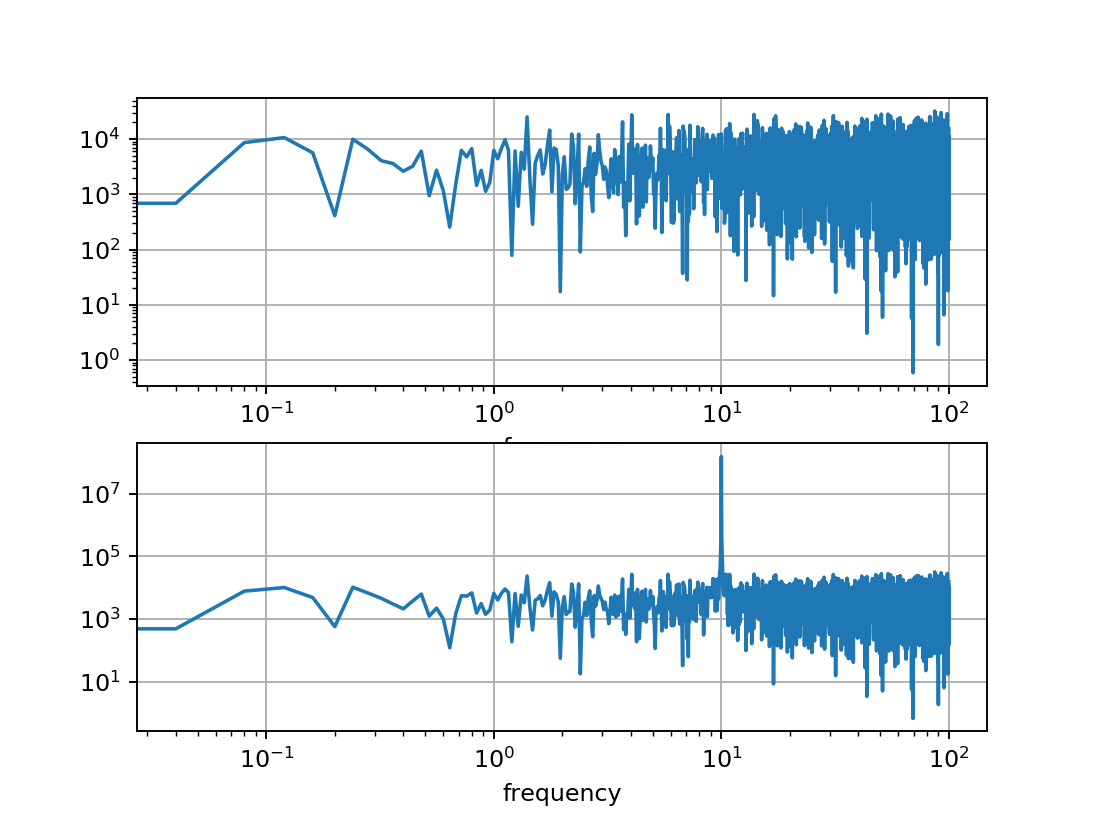

2500


Text(0.5,0,'frequency')

In [29]:
# Create an array of random normalized numbers (creates the white noise)
mean = 0.0
std = 1
num_samples = 5000
ninstances = 200
Allsamples = np.zeros((num_samples,ninstances))
for i in range(ninstances):
    samples = np.random.normal(mean, std, size=num_samples)
    Allsamples[:,i] = samples

# This is a time axis
tmax =  25
t = np.linspace(0,tmax,num_samples)

# Average the normalized numbers
avgsample = np.average(Allsamples,axis=1)
avgsample_scaled = avgsample*ninstances**.5

# Pick out the maximum for plotting purposes
yscalemax = np.max(Allsamples[:,0])

# Open up a new window
plt.figure()

# Plot the 1st instance
plt.subplot(311)
plt.plot(t,Allsamples[:,0],label='1st instance',color='red')
plt.ylim([-yscalemax,yscalemax])
plt.xlabel('time')
plt.legend()

# Plot the averaged numbers
plt.subplot(312)
plt.plot(t,avgsample,label='avg',color='green')
plt.ylim([-yscalemax,yscalemax])
plt.xlabel('time')
plt.legend()

# Plot the square root of those averaged numbers
plt.subplot(313)
plt.plot(t,avgsample_scaled,label='avg scaled by N^.5',color='blue')
plt.ylim([-yscalemax,yscalemax])
plt.xlabel('time')
plt.legend()

# Get a power spectrum
myfreq, mypower = powerspectrum(t,avgsample_scaled)

# New window
plt.figure()

# Plot the power spectrum
plt.subplot(211)
plt.loglog(myfreq,mypower)
plt.grid(True)
plt.xlabel('frequency')

# This adds on a sin function (optional)
omega = 10
cosineamp = 5
newfoft = avgsample_scaled + cosineamp*np.cos(np.pi*2*omega*t)
myfreq, mypower = powerspectrum(t,newfoft)

# Look at the power spectrum
plt.subplot(212)
plt.loglog(myfreq, mypower)
plt.grid(True)
plt.xlabel('frequency')

This code block looks at flicker noise

<std> of the input instances = 0.6011716401562853
std of the averaged/scaled signal = 0.5338984725485248


<IPython.core.display.Javascript object>


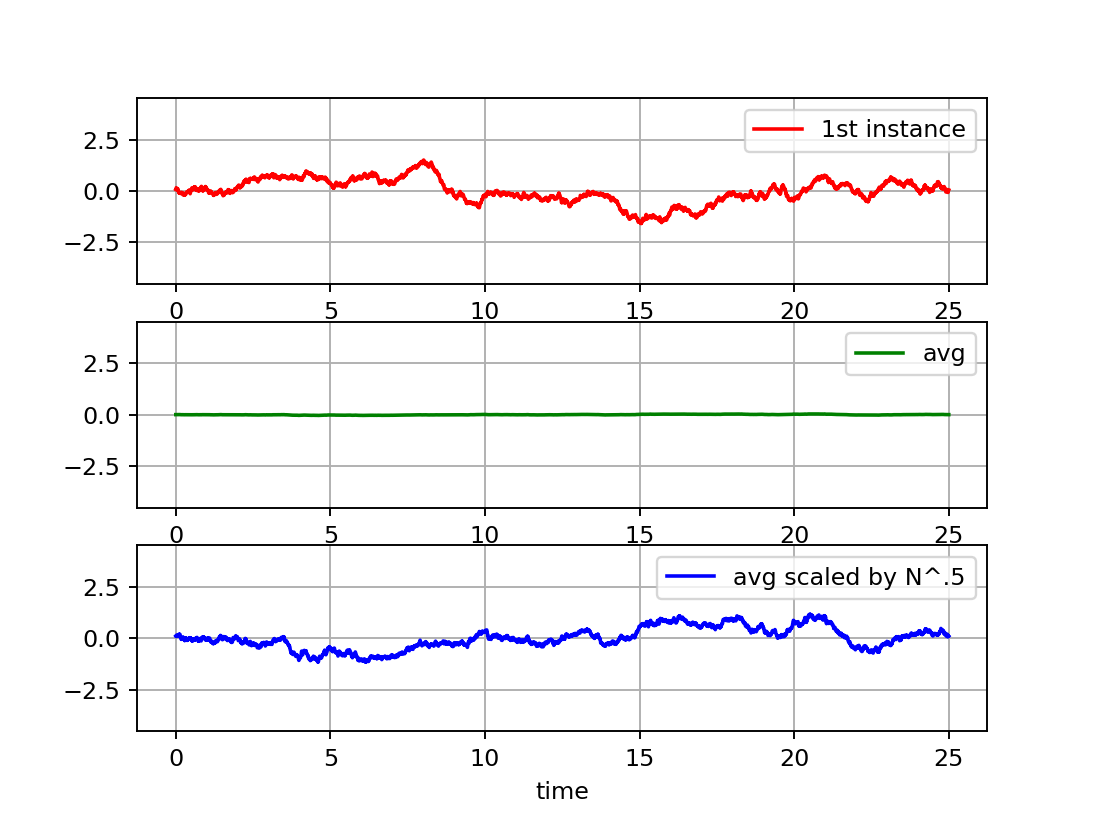

2500


<IPython.core.display.Javascript object>


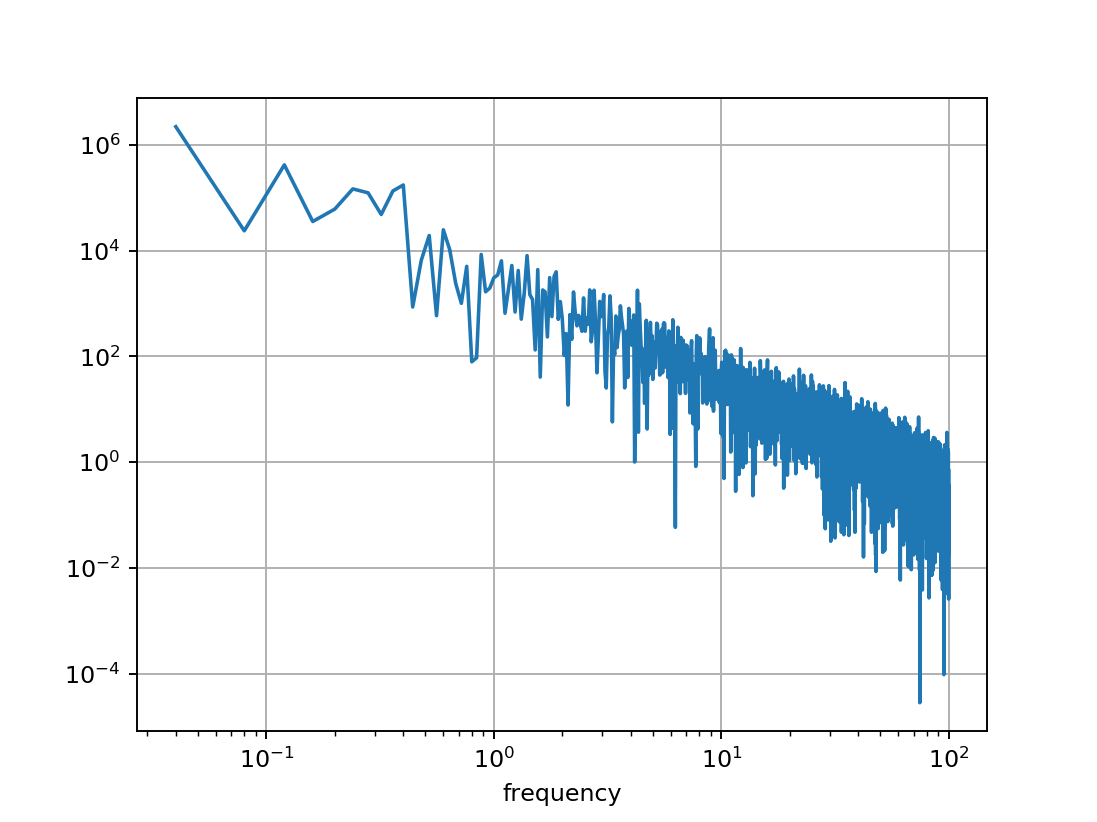

Text(0.5,0,'frequency')

In [28]:
# This is a time axis
num_samples = 5000
tmax =  25
t = np.linspace(0,tmax,num_samples)

# Create an array of flicker signals
mean = 0.0
std = 1
ninstances = 1000
Allsamples = np.zeros((num_samples,ninstances))
stds = np.zeros(ninstances)
for i in range(ninstances):
    samples = givemeflicker(t,std)
    Allsamples[:,i] = samples
    stds[i] = np.std(Allsamples[:,0])
print('<std> of the input instances =', np.mean(stds))
    
# Average the normalized numbers
avgsample = np.average(Allsamples,axis=1)
avgsample_scaled = avgsample*ninstances**.5
print('std of the averaged/scaled signal =', np.std(avgsample_scaled))

# Pick out the maximum for plotting purposes
yscalemax = np.max(Allsamples[:,0])*3

# Open up a new window
plt.figure()

# Plot the 1st instance
plt.subplot(311)
plt.plot(t,Allsamples[:,0],label='1st instance',color='red')
plt.ylim([-yscalemax,yscalemax])
plt.xlabel('time')
plt.grid(True)
plt.legend()

# Plot the averaged numbers
plt.subplot(312)
plt.plot(t,avgsample,label='avg',color='green')
plt.ylim([-yscalemax,yscalemax])
plt.xlabel('time')
plt.grid(True)
plt.legend()

# Plot the square root of those averaged numbers
plt.subplot(313)
plt.plot(t,avgsample_scaled,label='avg scaled by N^.5',color='blue')
plt.ylim([-yscalemax,yscalemax])
plt.xlabel('time')
plt.grid(True)
plt.legend()

# Get a power spectrum
myfreq, mypower = powerspectrum(t,avgsample_scaled)

# New window
plt.figure()

# Plot the power spectrum
plt.loglog(myfreq[1:],mypower[1:])
plt.grid(True)
plt.xlabel('frequency')